In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
# from matplotlib.legend_handler import HandlerLine2D
# plt.legend(loc='upper left',prop={'size':12},numpoints=1)

How speed scales with n_cluster 

In [8]:
pwd

u'/global/project/projectdirs/astro250/doris/halo/halo_find'

In [9]:
kmeans_time = []
with open("4test1/sctest.3991960.edique02.out", 'r+') as f:
    lines = f.readlines()
    for i in range(0, len(lines)):
        if lines[i][:4]=="Time":
            kmeans_time.append(float(lines[i][5:]))
with open("4test1/sctest.3996883.edique02.out", 'r+') as f:
    lines = f.readlines()
    for i in range(0, len(lines)):
        if lines[i][:4]=="Time":
            kmeans_time.append(float(lines[i][5:]))

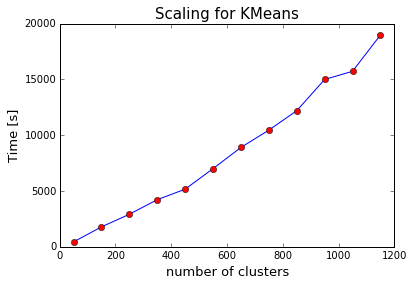

In [35]:
# For N= 10000
k_range=np.arange(50,1250,100)
plt.plot(k_range,kmeans_time)
plt.plot(k_range,kmeans_time,'o',color="red")
plt.xlabel("number of clusters",fontsize=13)
plt.ylabel("Time [s]",fontsize=13)
plt.title("Scaling for KMeans",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

So it looks like the time it takes KMeans to finish the run scales linearly with the size of cluster 

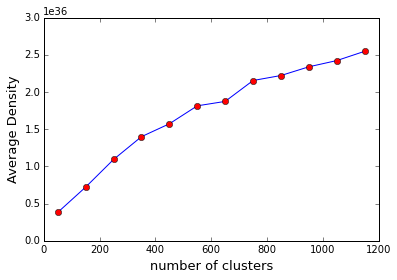

In [24]:
import os
import glob
avrg_densities=[]
for n in k_range:
    avrg_densities.append(mean(np.loadtxt("4test1/density{}.txt".format(n))))
plt.plot(k_range,avrg_densities)
plt.plot(k_range,avrg_densities,'o',color = 'red')
plt.xlabel("number of clusters",fontsize=13)
plt.ylabel("Average Density",fontsize=13)
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In [8]:
np.arange(950,2000,100)

array([ 950, 1050, 1150, 1250, 1350, 1450, 1550, 1650, 1750, 1850, 1950])

Okay since njob doesn't even help with speedup ,then there's no concern to just switch to minibatch kmeans (which doesn't have njob, but it samples with smaller random minibatches, note that SGD is aggressive and affect clustering result )

# MiniBatch KMeans 

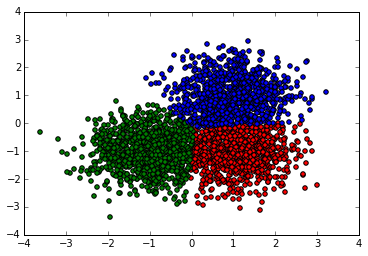

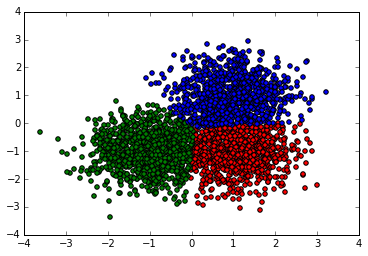

In [12]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
np.random.seed(0)
batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)
num_clusters=3
mbk = MiniBatchKMeans(init='k-means++', n_clusters=num_clusters, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)

mbk.fit(X)
# centers=clf.cluster_centers_
# labels=clf.predict(X)
centers = mbk.cluster_centers_
# labels= mbk.labels_
labels = mbk.predict(X)
labels2 = mbk.labels_
fig = plt.figure()
colors = ['r','g','b']
color = ["red","green","blue","cyan","purple","orange","magenta","brown","yellow","lime"]
for i in range(num_clusters):
    group  = np.where(labels==i)
    plt.scatter(X[group,0], X[group,1],c=color[i])
fig = plt.figure()
colors = ['r','g','b']
color = ["red","green","blue","cyan","purple","orange","magenta","brown","yellow","lime"]
for i in range(num_clusters):
    group  = np.where(labels2==i)
    plt.scatter(X[group,0], X[group,1],c=color[i])    

The use of clustercenters_ and predict to get the centers and labels is the same according to [sklearn docs](
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict)

batch_size = 3k 

In [37]:
print len(time)
print len(avrg_densities)
print  len(k_range1)

42
42
47


In [31]:
np.arange(4250,6000,100)

array([4250, 4350, 4450, 4550, 4650, 4750, 4850, 4950, 5050, 5150, 5250,
       5350, 5450, 5550, 5650, 5750, 5850, 5950])

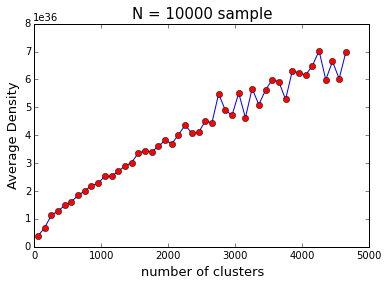

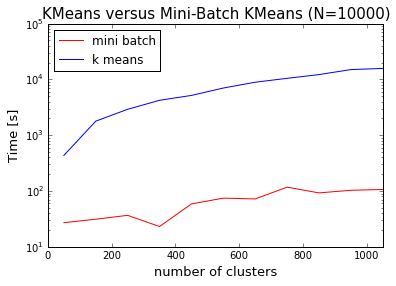

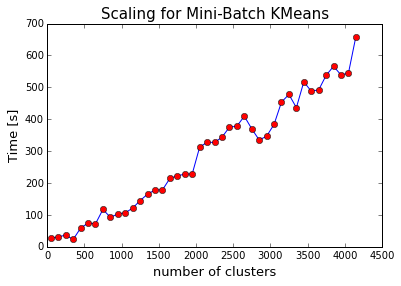

In [38]:
time = [27.0535838604,31.1984300613,36.6235392094,23.0920679569,58.6500828266,74.4998619556,72.1043970585,117.190282106,92.5122289658,102.997347832,106.487787962,121.692922831,144.752175808,165.289230108,178.292635918,178.476800919,214.547892094,222.605364084,227.866707087,228.504936934,312.655081987,327.827723026,327.280194044,343.671331882,375.227014065,378.213885069, 409.541679859,370.066655874,334.967818975,346.907697916,383.921590805,453.981445074,477.693629026,436.450512886,517.437378883,487.992439985,492.155740023,537.763944864,566.132948875,538.869642019,544.889523983,659.431041002]
avrg_densities=[]
k_range = np.arange(50,4250,100)
k_range1 = np.arange(50,4750,100)
for n in k_range1:
    avrg_densities.append(mean(np.loadtxt("minibatch_kmeans/density{}.txt".format(n))))
plt.plot(k_range1,avrg_densities)
plt.plot(k_range1,avrg_densities,'o',color = 'red')
plt.title("N = 10000 sample ",fontsize=15)
plt.xlabel("number of clusters",fontsize=13)
plt.ylabel("Average Density",fontsize=13)
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

plt.figure()
plt.semilogy(k_range,time,color="red",label="mini batch")
k_mean_k_range=np.arange(50,1350,100)
plt.semilogy(k_mean_k_range,kmeans_time,label="k means")
plt.xlabel("number of clusters",fontsize=13)
plt.ylabel("Time [s]",fontsize=13)
plt.title("KMeans versus Mini-Batch KMeans (N=10000)",fontsize=15)
plt.legend(loc='upper left',prop={'size':12},numpoints=1)
plt.xlim(0,1050)
plt.figure()
plt.plot(k_range,time)
plt.plot(k_range,time,'o',color="red")
plt.xlabel("number of clusters",fontsize=13)
plt.ylabel("Time [s]",fontsize=13)
plt.title("Scaling for Mini-Batch KMeans",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

### Testing fidelity of results 

In [57]:
ls 4test1/centers*.txt

4test1/centers1050.txt  4test1/centers350.txt  4test1/centers650.txt
4test1/centers1150.txt  4test1/centers450.txt  4test1/centers750.txt
4test1/centers150.txt   4test1/centers50.txt   4test1/centers850.txt
4test1/centers250.txt   4test1/centers550.txt  4test1/centers950.txt


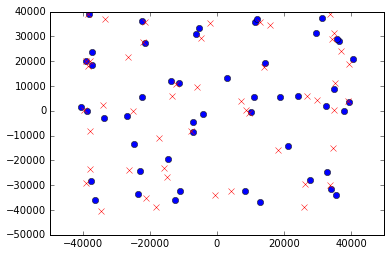

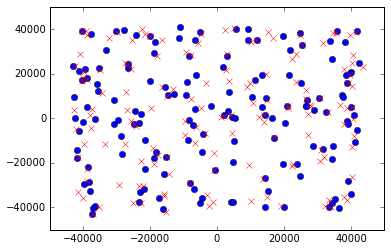

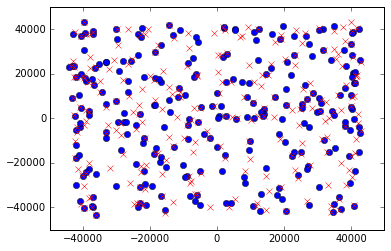

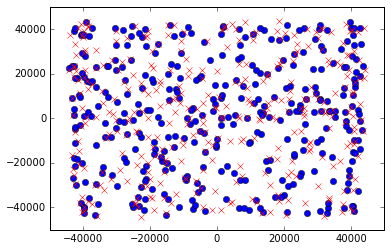

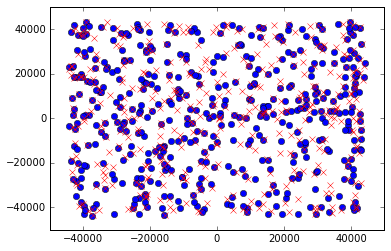

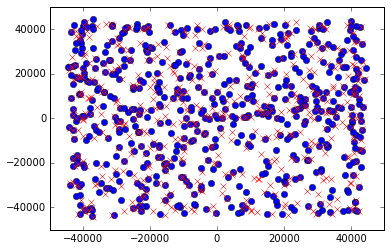

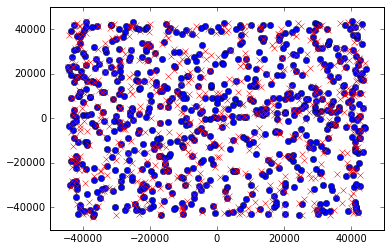

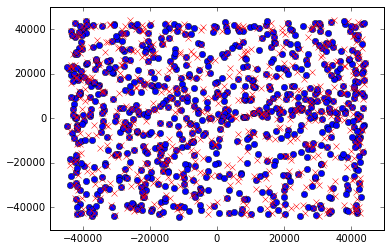

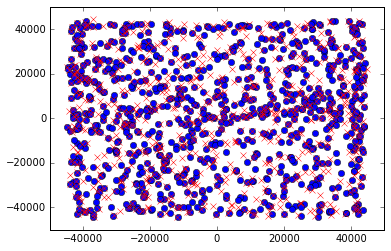

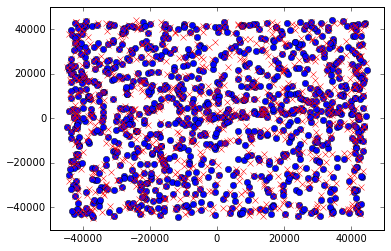

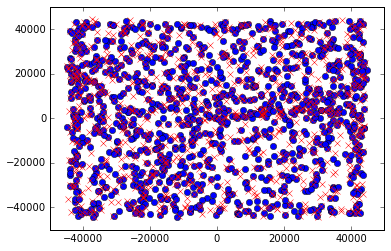

In [5]:
for i in np.arange(50,1150,100):
    mbk_centers = np.loadtxt("minibatch_kmeans/centers{}.txt".format(i))
    centers = np.loadtxt("4test1/centers{}.txt".format(i))
#     print mbk_centers-centers
#     print mbk_centers - centers #can't really do this because the vectors are not matched #not even with sort 
    plt.figure()
    plt.plot(centers[:,0],centers[:,1],'o')
    plt.plot(mbk_centers[:,0],mbk_centers[:,1],'x', color="red")
#     plt.plot(mbk_centers,'o')

Compute the RMS between the data 

In [ ]:
accuracy 

In [39]:
np.arange(100,50000,1000)

array([  100,  1100,  2100,  3100,  4100,  5100,  6100,  7100,  8100,
        9100, 10100, 11100, 12100, 13100, 14100, 15100, 16100, 17100,
       18100, 19100, 20100, 21100, 22100, 23100, 24100, 25100, 26100,
       27100, 28100, 29100, 30100, 31100, 32100, 33100, 34100, 35100,
       36100, 37100, 38100, 39100, 40100, 41100, 42100, 43100, 44100,
       45100, 46100, 47100, 48100, 49100])

In [ ]:
labels150.txt